In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
di.display_html('''<h3>Percent coverage of habitats based on different point sampling methods - per site. </h3>''', raw=True) 

Percent coverage of habitats based on different point sampling methods - per site.

Sampling type: (5 point), Prediction score threshold: 0.9, Data coverage: 81.7382567194
Sampling type: (20 random), Prediction score threshold: 0.9, Data coverage: 79.8700243704
Sampling type: (169 grid), Prediction score threshold: 0.9, Data coverage: 79.0438331274
 
       ALGAE      CORAL      OTHER                                REEF
0  33.254157  42.042755  24.703088    Havannah Island MMP1 2m(5 point)
1  37.482419  49.929677  12.587904  Havannah Island MMP1 2m(20 random)
2  33.903743  52.562731  13.533525   Havannah Island MMP1 2m(169 grid)
       ALGAE      CORAL      OTHER                           REEF
0  79.843444   9.589041  10.567515    Saxon Reef Flat 2m(5 point)
1  85.972732   9.229156   4.798112  Saxon Reef Flat 2m(20 random)
2  84.574804  10.942633   4.482563   Saxon Reef Flat 2m(169 grid)
       ALGAE      CORAL      OTHER                             REEF
0  64.102564  16.568047  19.329389    Rib South Front 7.7m(5 point)
1  75.717439  17.660044   6.622517  Rib South F

/usr/lib/pymodules/python2.7/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


       ALGAE      CORAL      OTHER                                REEF
0  63.348416  15.158371  21.493213    Havannah Island MMP2 5m(5 point)
1  74.830769  16.923077   8.246154  Havannah Island MMP2 5m(20 random)
2  73.196262  16.889720   9.914019   Havannah Island MMP2 5m(169 grid)
       ALGAE      CORAL      OTHER                                REEF
0  44.325482  32.762313  22.912206    Rib NE Front LTMP1 6.3m(5 point)
1  52.656434  40.141677   7.201889  Rib NE Front LTMP1 6.3m(20 random)
2  50.691474  40.725691   8.582834   Rib NE Front LTMP1 6.3m(169 grid)
       ALGAE      CORAL      OTHER                                        REEF
0  54.261954  32.432432  13.305613    John Brewer North East Front 3m(5 point)
1  61.261792  33.018868   5.719340  John Brewer North East Front 3m(20 random)
2  58.717035  35.744833   5.538133   John Brewer North East Front 3m(169 grid)
       ALGAE      CORAL      OTHER                                 REEF
0  78.638941   9.262760  12.098299    Davies

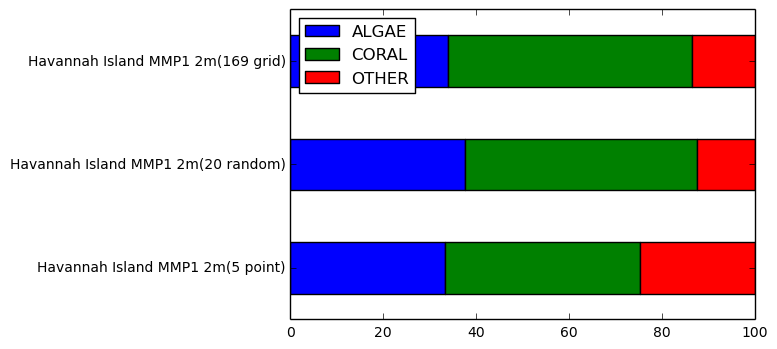

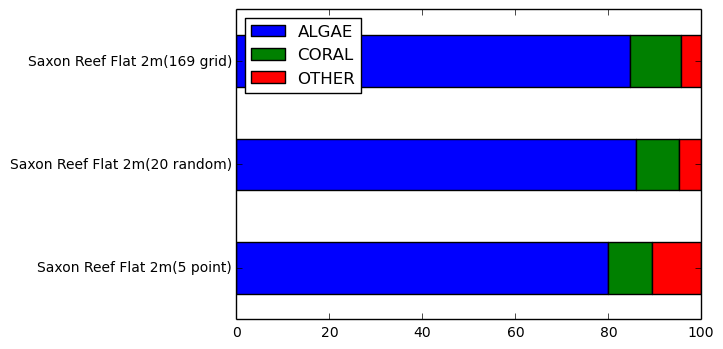

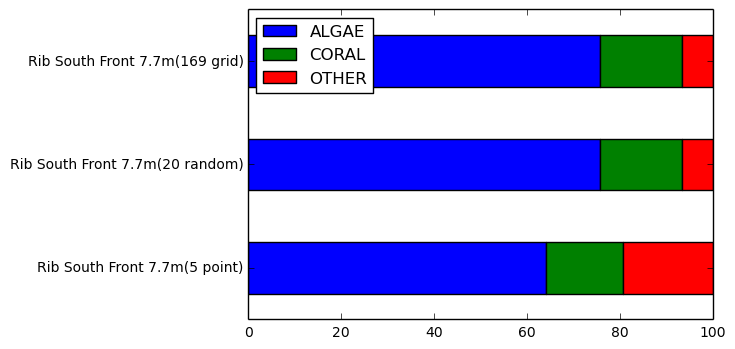

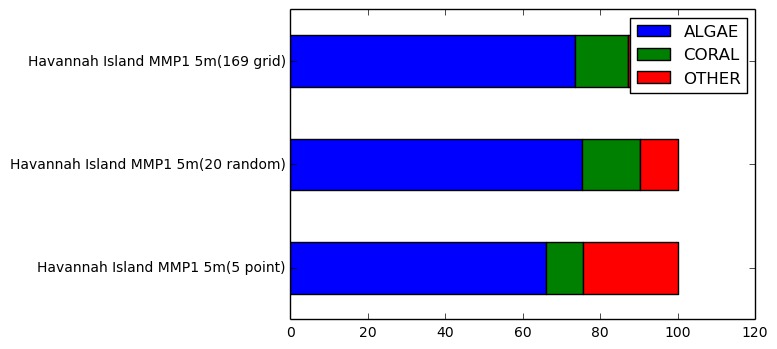

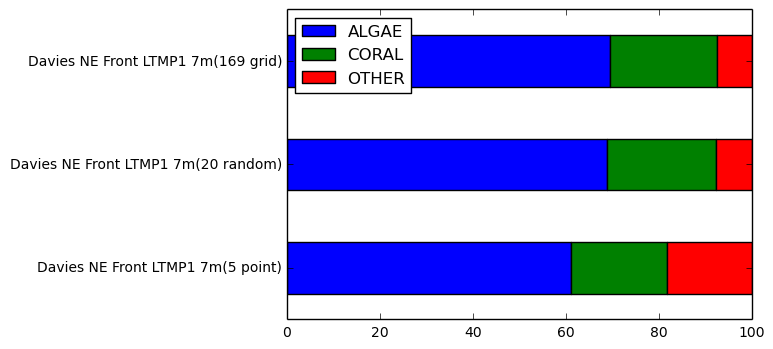

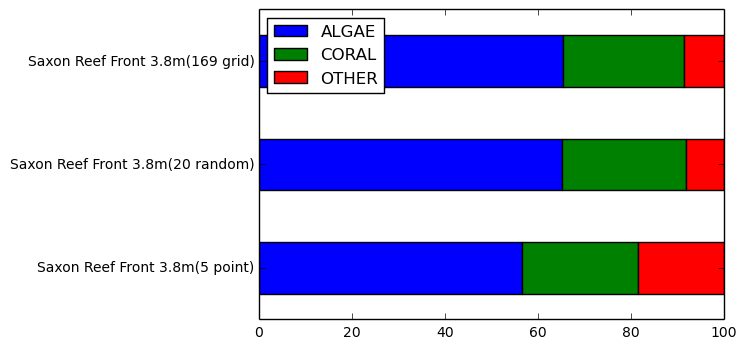

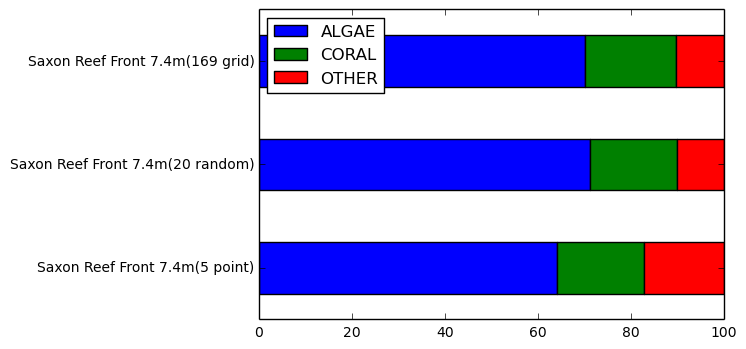

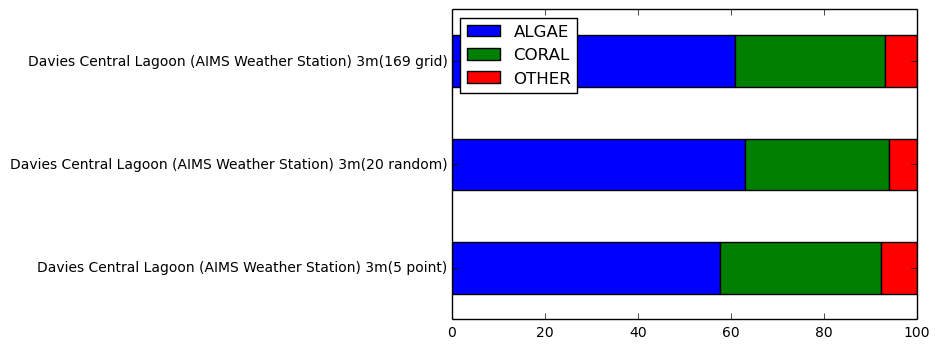

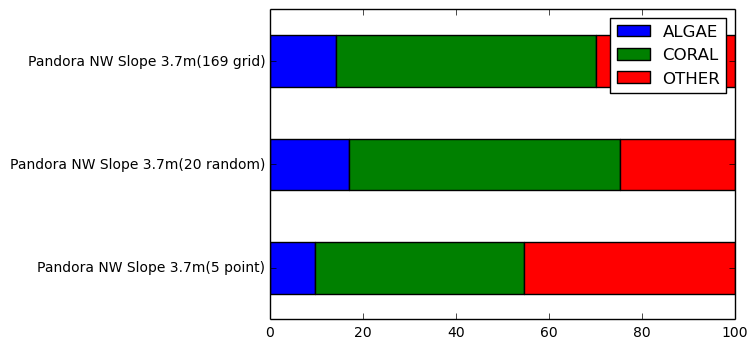

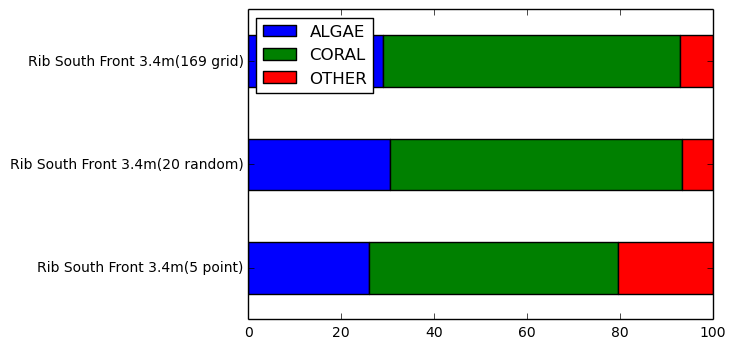

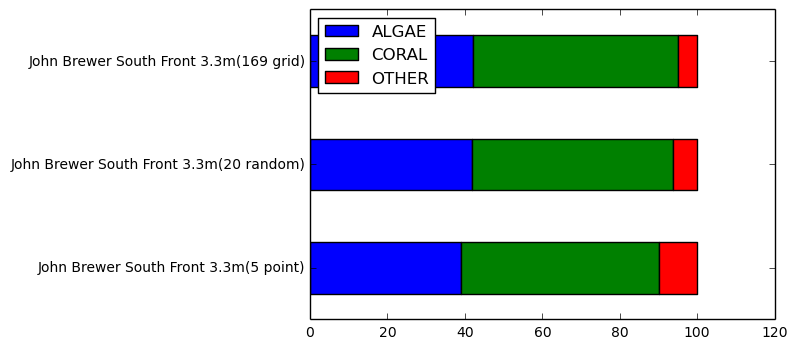

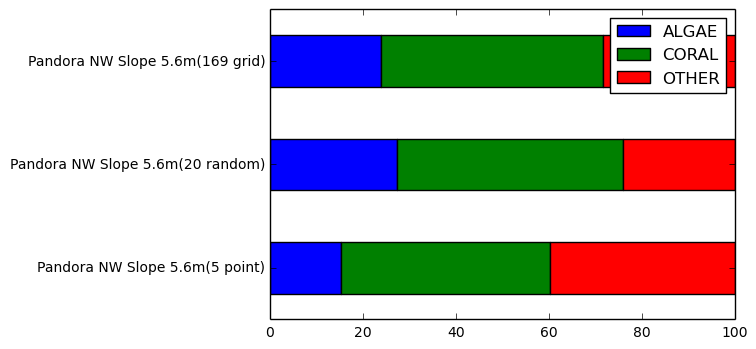

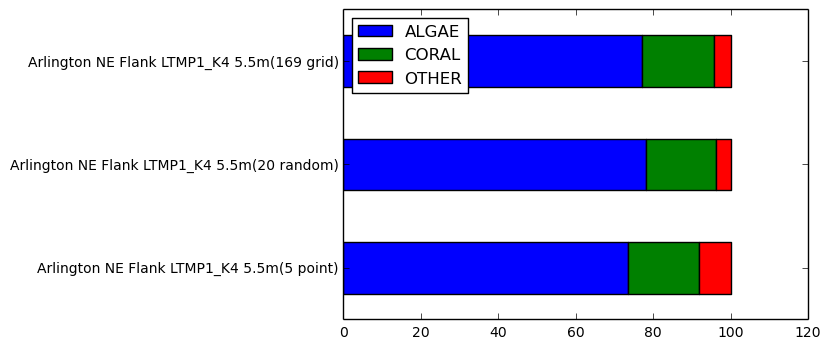

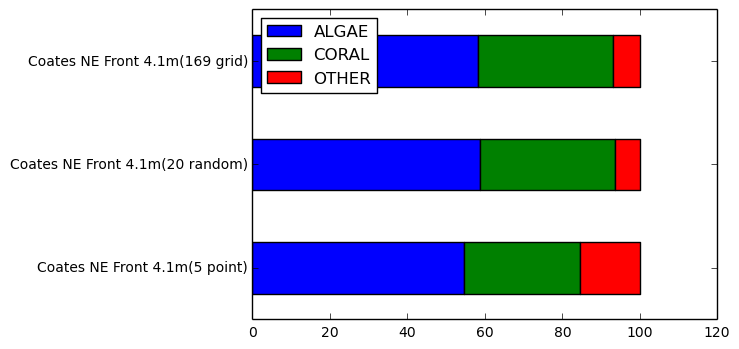

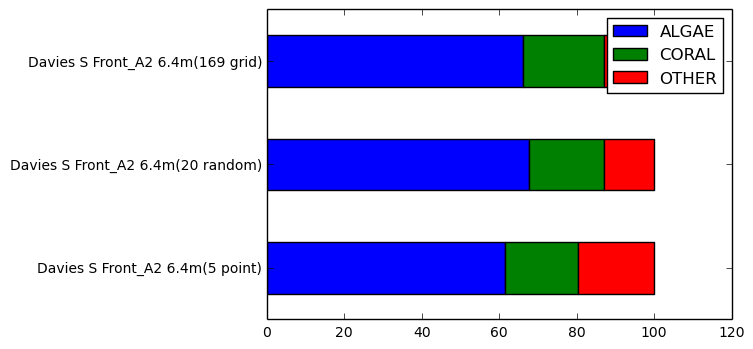

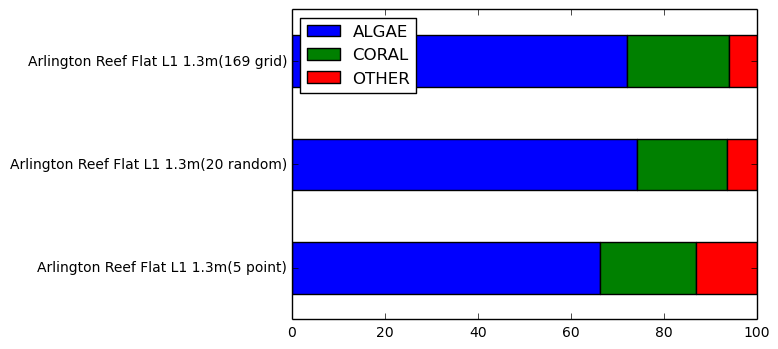

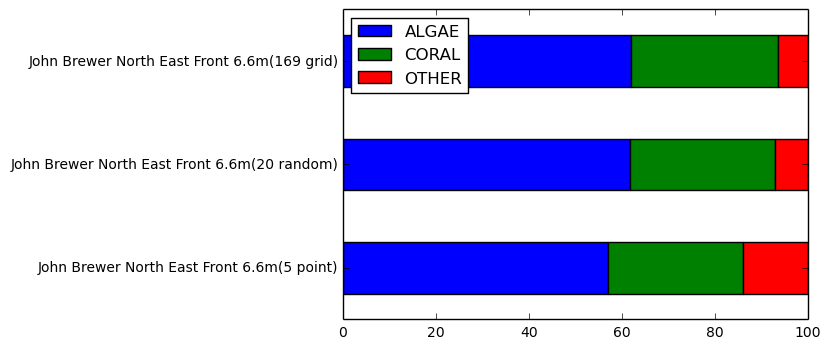

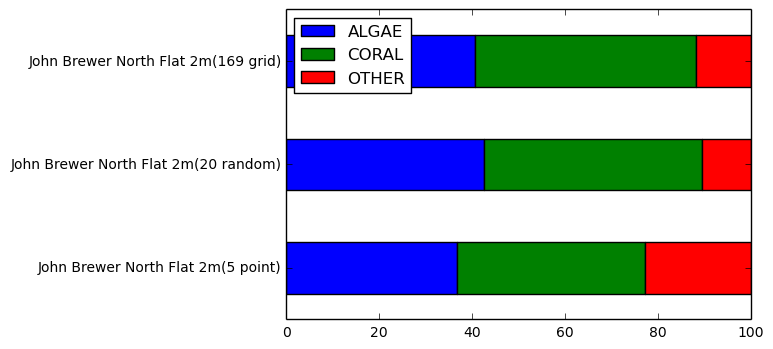

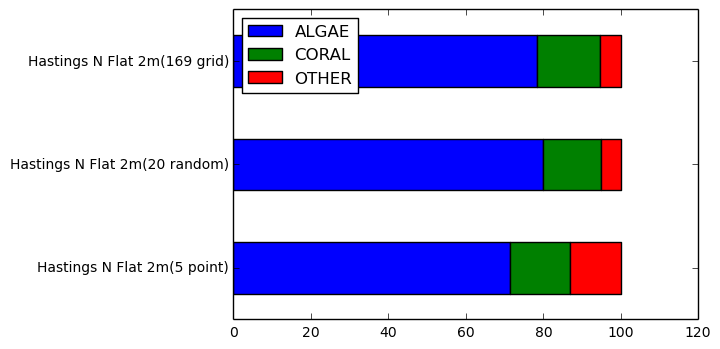

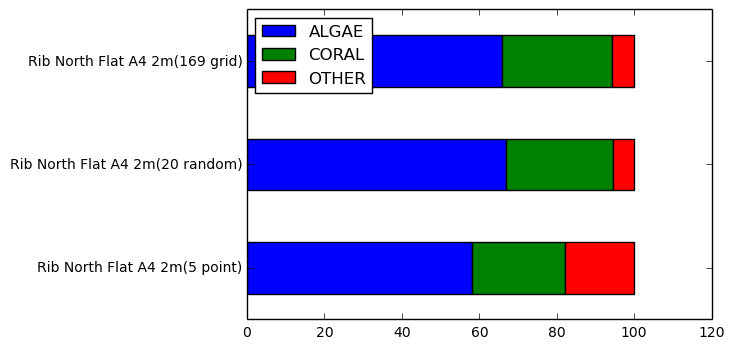

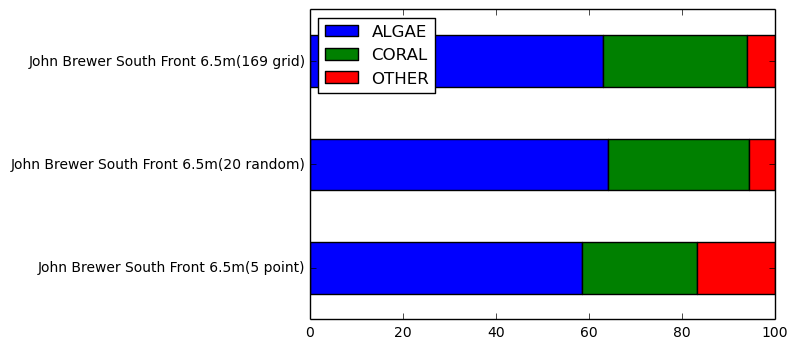

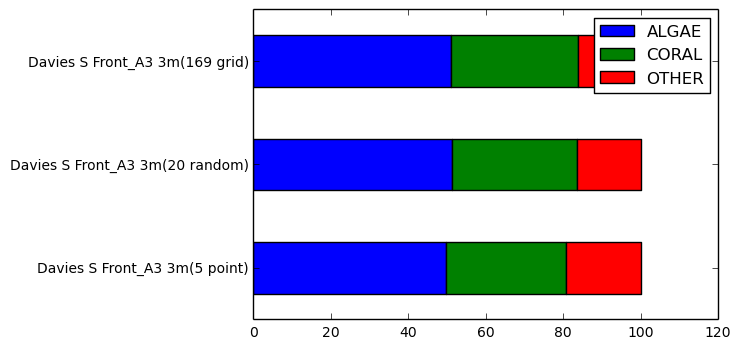

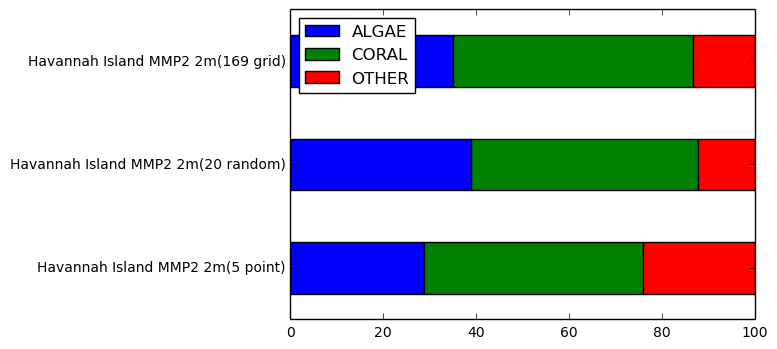

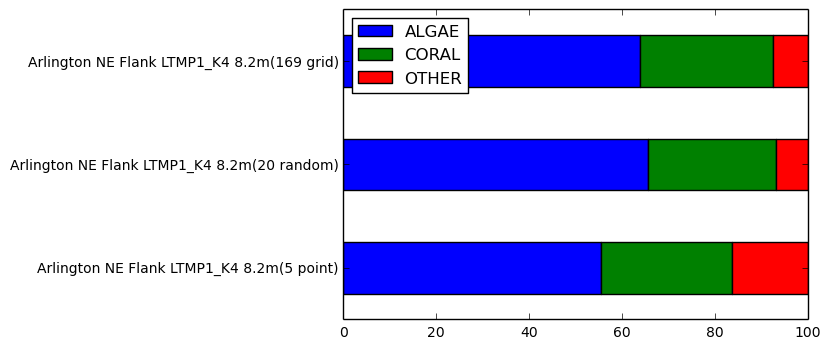

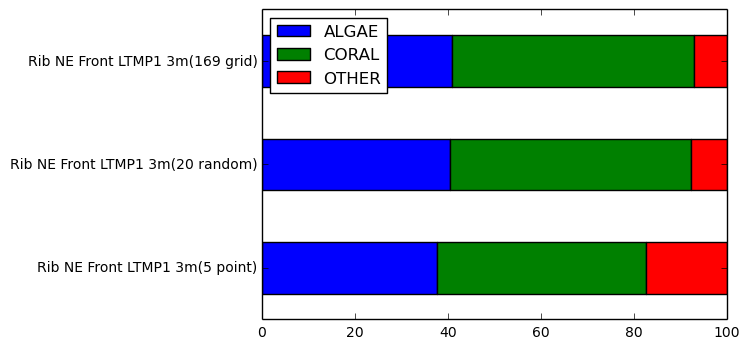

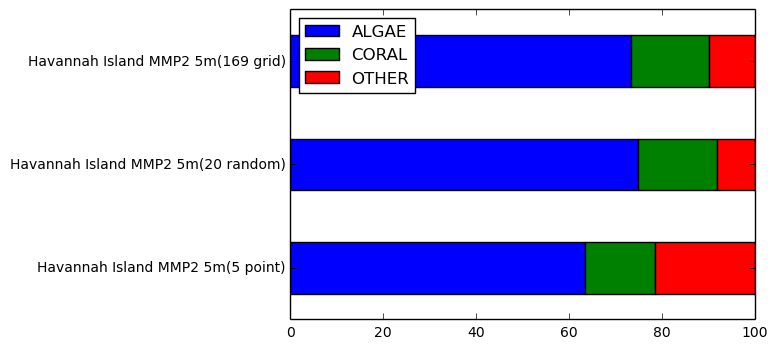

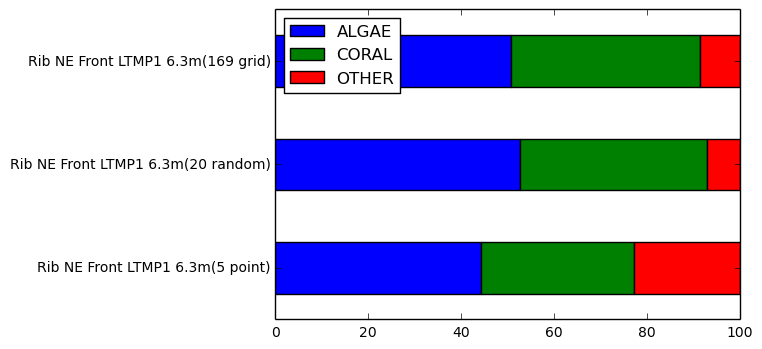

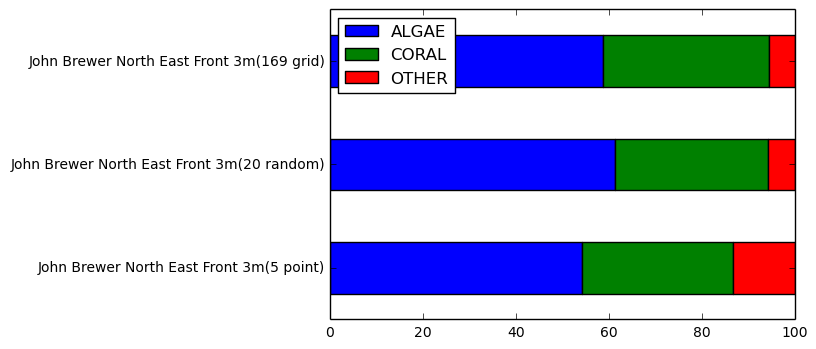

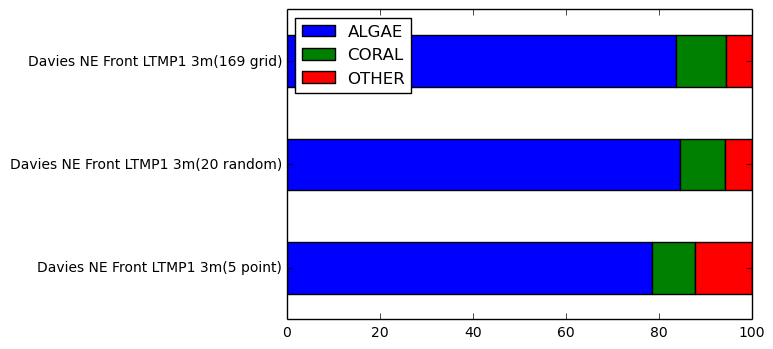

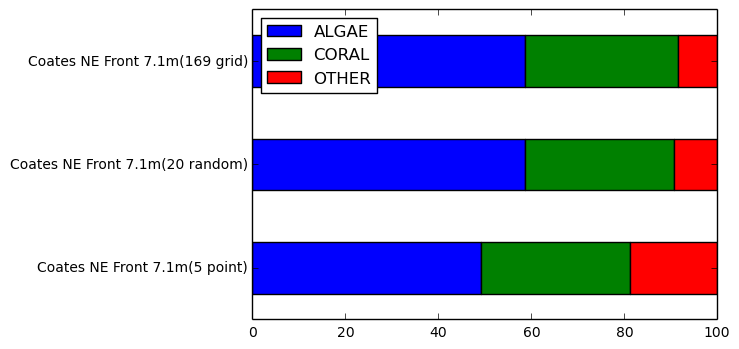

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import csv
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, classification_report, \
    precision_recall_curve
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, HTML
import pandas as pd

%matplotlib inline

with open('predictions-gbr-bleaching-tune-NT.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = list(row for row in reader)

for row in rows:
    
    if row["PREDICTION"] == "HARD CORAL" or row["PREDICTION"] == "SOFT CORAL":
        row["PREDICTION"] = "CORAL"
    elif row["PREDICTION"] == "ALGAE":
        row["PREDICTION"] = "ALGAE"
    else:
        row["PREDICTION"] = "OTHER"
    
nt_df = pd.DataFrame(rows)

with open('predictions-gbr-bleaching-tune-NTRandom20.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = list(row for row in reader)

for row in rows:
    
    if row["PREDICTION"] == "HARD CORAL" or row["PREDICTION"] == "SOFT CORAL":
        row["PREDICTION"] = "CORAL"
    elif row["PREDICTION"] == "ALGAE":
        row["PREDICTION"] = "ALGAE"
    else:
        row["PREDICTION"] = "OTHER"
    
ntrandom20_df = pd.DataFrame(rows)

with open('predictions-gbr-bleaching-tune-NTGrid.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    rows = list(row for row in reader)

for row in rows:
    
    if row["PREDICTION"] == "HARD CORAL" or row["PREDICTION"] == "SOFT CORAL":
        row["PREDICTION"] = "CORAL"
    elif row["PREDICTION"] == "ALGAE":
        row["PREDICTION"] = "ALGAE"
    else:
        row["PREDICTION"] = "OTHER"
    
ntgrid_df = pd.DataFrame(rows)

groups = ["HARD CORAL", "SOFT CORAL", "ABIOTIC", "ALGAE", "SPONGE", "SEAGRASS", "OTHER", "INDETERMINATE"]
groups_orig = ["HC", "SC", "AB", "A", "SP", "SG", "OT", "IN"]

groups = ["CORAL", "OTHER", "ALGAE"]
groups_orig = ["CORAL", "OTHER", "ALGAE"]

def tally_reef_coverages(dataframe, sampling, prediction_score_threshold=0.9):
    #df = dataframe.sample(frac=0.1)
    
    reefs = dataframe['REEF_NAME'].unique()
    prediction_codes = dataframe['PREDICTION'].unique()
    dataframe['PREDICTION_SCORE'] = dataframe['PREDICTION_SCORE'].astype('float64')
    
    #for pred_code in prediction_codes:
    #    print(pred_code)
    #    dataframe.ix[dataframe["PREDICTION"] == pred_code, 'PREDICTION'] = groups_orig[groups.index(pred_code)]
    
    printable = []
    df_construct = {}
    
    for reef in reefs:
        predicted_total = float(len((dataframe.loc[(dataframe['REEF_NAME'] == reef) & (dataframe['PREDICTION_SCORE'] >= prediction_score_threshold)])))
        reef_names = df_construct.get("REEF", [])
        reef_names.append(reef + sampling)
        df_construct["REEF"] = reef_names
        for code in prediction_codes:
            predicted_code_total = float(len(dataframe.loc[(dataframe['REEF_NAME'] == reef) & (dataframe['PREDICTION'] == code) & (dataframe['PREDICTION_SCORE'] >= prediction_score_threshold)]))
            #print(reef + ": " + code + ": " + str(predicted_code_total/predicted_total*100))
            #df_construct.get(code+"(5point)", []).append(str(predicted_code_total/predicted_total*100))
            code_names = df_construct.get(code, [])
            code_names.append(predicted_code_total/predicted_total*100)
            df_construct[code] = code_names
    
    data_coverage = float(len((dataframe.loc[(dataframe['PREDICTION_SCORE'] >= prediction_score_threshold)])))/len(dataframe) * 100.0
    print("Sampling type: " + sampling + ", Prediction score threshold: 0.9, Data coverage: " + str(data_coverage) )
    return df_construct
    


result_df = pd.DataFrame( tally_reef_coverages(nt_df, "(5 point)"))
result_df2 = pd.DataFrame( tally_reef_coverages(ntrandom20_df, "(20 random)"))
result_df3 = pd.DataFrame( tally_reef_coverages(ntgrid_df, "(169 grid)"))

print(" ")

for index, row in result_df.iterrows():
    chart_df = pd.concat([result_df[index:index+1], result_df2[index:index+1], result_df3[index:index+1]], ignore_index=True)
    chart_df.reset_index()
    print(chart_df)
    #chart_df.plot(kind="barh", stacked=True, yticks=chart_df.index)
    ax = chart_df.plot(kind="barh", stacked=True)
    ax.set_yticks(chart_df.index)
    ax.set_yticklabels(chart_df["REEF"])

    #ax.barh(stacked=True)
#print(result_df)

In [97]:
di.display_html('''<h3>Number of images containing particular habitats based on sampling type. (Note: Finer sampling of points gives greater number of images with instances of habitats i.e. less points per image can miss things) </h3>''', raw=True) 

corals = nt_df.loc[(nt_df['PREDICTION'] == "CORAL") & (nt_df['PREDICTION_SCORE'] >= 0.9)]
corals2 = ntrandom20_df.loc[(ntrandom20_df['PREDICTION'] == "CORAL") & (ntrandom20_df['PREDICTION_SCORE'] >= 0.9)]
corals3 = ntgrid_df.loc[(ntgrid_df['PREDICTION'] == "CORAL") & (ntgrid_df['PREDICTION_SCORE'] >= 0.9)]

print("5 point total coral images: " + str(len(corals.FILEPATH.unique())))
print("20 point total coral images: " + str(len(corals2.FILEPATH.unique())))
print("169 point total coral images: " + str(len(corals3.FILEPATH.unique())))

corals = nt_df.loc[(nt_df['PREDICTION'] == "ALGAE") & (nt_df['PREDICTION_SCORE'] >= 0.9)]
corals2 = ntrandom20_df.loc[(ntrandom20_df['PREDICTION'] == "ALGAE") & (ntrandom20_df['PREDICTION_SCORE'] >= 0.9)]
corals3 = ntgrid_df.loc[(ntgrid_df['PREDICTION'] == "ALGAE") & (ntgrid_df['PREDICTION_SCORE'] >= 0.9)]

print("5 point total algae images: " + str(len(corals.FILEPATH.unique())))
print("20 point total algae images: " + str(len(corals2.FILEPATH.unique())))
print("169 point total algae images: " + str(len(corals3.FILEPATH.unique())))

corals = nt_df.loc[(nt_df['PREDICTION'] == "OTHER") & (nt_df['PREDICTION_SCORE'] >= 0.9)]
corals2 = ntrandom20_df.loc[(ntrandom20_df['PREDICTION'] == "OTHER") & (ntrandom20_df['PREDICTION_SCORE'] >= 0.9)]
corals3 = ntgrid_df.loc[(ntgrid_df['PREDICTION'] == "OTHER") & (ntgrid_df['PREDICTION_SCORE'] >= 0.9)]

print("5 point total other images: " + str(len(corals.FILEPATH.unique())))
print("20 point total other images: " + str(len(corals2.FILEPATH.unique())))
print("169 point total other images: " + str(len(corals3.FILEPATH.unique())))


Number of images containing particular habitats based on sampling type. (Note: Finer sampling of points gives greater number of images with instances of habitats i.e. less points per image can miss things)

5 point total coral images: 2570
20 point total coral images: 3281
169 point total coral images: 3687
5 point total algae images: 3447
20 point total algae images: 3617
169 point total algae images: 3691
5 point total other images: 2498
20 point total other images: 2442
169 point total other images: 3625
